In [1]:
#install library
#!pip install scikit-learn 
#!pip install matplotlib


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import os
#print("Matplotlib installed successfully!")

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'car data.csv',
 'Linear Regression.ipynb',
 'Linear_two.ipynb',
 'marital status.csv',
 'nasdaq100.csv',
 'Salary Data.csv']

In [4]:
df=pd.read_csv('nasdaq100.csv',sep=';')
df

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700
5,01.08.23,16800,16400
6,01.07.23,15900,16200
7,01.06.23,15800,15500
8,01.05.23,16150,16100
9,01.04.23,16300,15800


In [5]:
#null value check
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [6]:
#Date column delete
## column delete axis=1 , row delete axis=0

df.drop('Date',axis=1)

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700
5,16800,16400
6,15900,16200
7,15800,15500
8,16150,16100
9,16300,15800


Text(0.5, 1.0, 'Stock Prices')

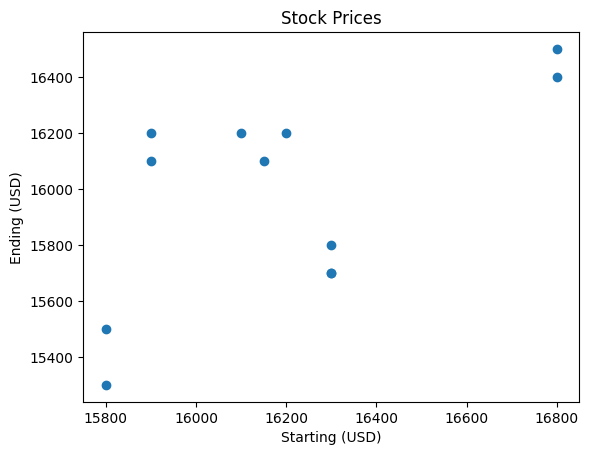

In [7]:

##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')



In [8]:
x=df[['Starting (USD)']]
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [9]:
y=df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


### Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()

Text(0.5, 1.0, 'Stock Prices')

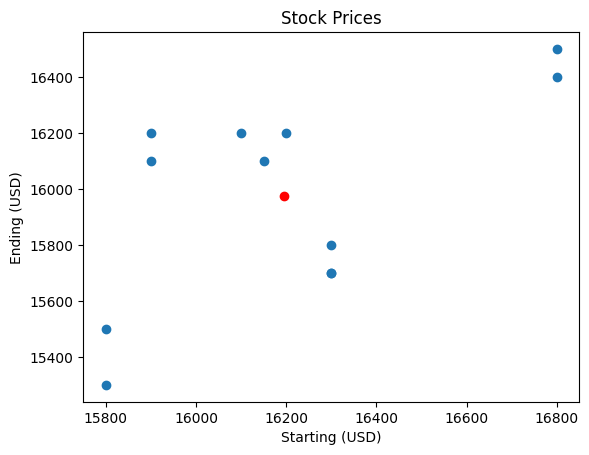

In [12]:
#mean finding and graph..... best fit line go through using mean line
#x.mean(),y.mean()

plt.scatter(x.mean(),y.mean(),color='red')
##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')


In [13]:
reg.fit(x, y)  #train the model

LinearRegression()

In [14]:

#coef_ (Coefficient) – "Slope"
#It tells you how much the target (output) changes when you change the input (feature).
m=reg.coef_
m

array([[0.65258293]])

In [15]:
#intercept_ (Bias) – "Starting Point"
#It's the value of the target (Y) when the input (X) is zero.
c=reg.intercept_
c

array([5405.87555702])

In [16]:
#law apply ---> y= mx + c

m*16700 + c

array([[16304.0105628]])

In [17]:
reg.predict([[16700]])


C:\Users\New User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [18]:
df['predicted_y']=reg.predict(x)

df.head()

,Date,Starting (USD),Ending (USD),predicted_y
0,01.01.24,16800,16500,16369.268856
1,01.12.23,15900,16100,15781.944215
2,01.11.23,15800,15300,15716.685922
3,01.10.23,16100,16200,15912.460802
4,01.09.23,16300,15700,16042.977389


In [19]:
df.drop('Date',axis=1)

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


Text(0.5, 1.0, 'Stock Prices')

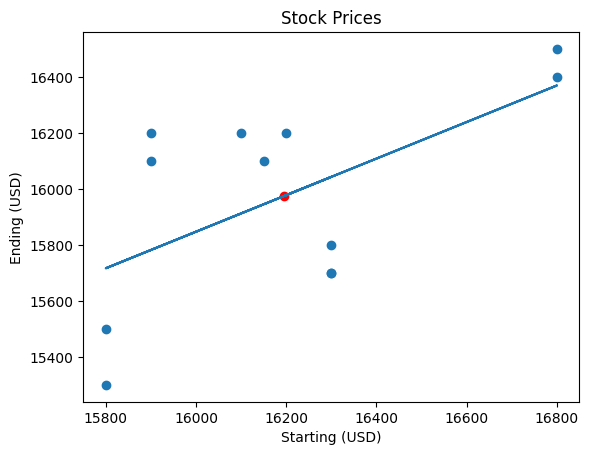

In [20]:
plt.plot(x,reg.predict(x))
#mean finding and graph..... best fit line go through using mean line
#x.mean(),y.mean()

plt.scatter(x.mean(),y.mean(),color='red')
##using matplotlib for graph
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

### reg.predict() in Simple Terms
##### The .predict() function in scikit-learn is used to make predictions using a trained linear regression model.

### How It Works
##### After training a model (reg.fit(X, y)), you can use reg.predict(X_new) to predict values for new inputs.

## Lose and cost function

### Loss Function in Linear Regression (Brief Explanation)
###### A loss function measures the error between the predicted value and the actual value for a single data point.
### Common Loss Function: Mean Squared Error (MSE)
###### Loss=(ytrue−ypredicted)2\text{Loss} = (y_{\text{true}} - y_{\text{predicted}})^2Loss=(ytrue​−ypredicted​)2

###### If prediction is close to the actual value → small loss ✅
###### If prediction is far from the actual value → large loss ❌

###### Example Calculation
###### If:
###### Actual value (y_true) = 10
###### Predicted value (y_pred) = 8
###### Loss=(10−8)2=4\text{Loss} = (10 - 8)^2 = 4Loss=(10−8)2=4
###### This loss is then used in the cost function to optimize the model.

In [21]:
## lose calculation
df['lose']= df['Ending (USD)'] - df['predicted_y']
df['lose']

0     130.731144
1     318.055785
2    -416.685922
3     287.539198
4    -342.977389
5      30.731144
6     418.055785
7    -216.685922
8     154.910051
9    -242.977389
10    222.280904
11   -342.977389
Name: lose, dtype: float64

In [22]:
## cost
#MSE and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
mse = mean_squared_error(df['Ending (USD)'], df['predicted_y'])
mse

80411.23397700385

In [24]:
mae = mean_absolute_error(df['Ending (USD)'], df['predicted_y'])
mae

260.3840017604666

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

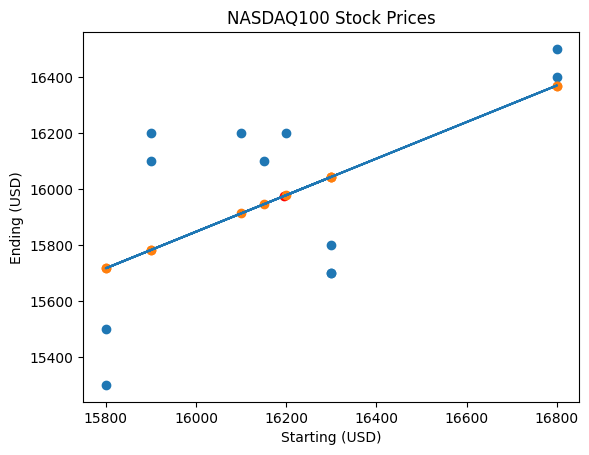

In [25]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.scatter(df['Starting (USD)'] , reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

In [26]:
### manually mae---
sum(abs(df['lose']))/len(x)  #len(x)====> means lenth of the dataset

260.3840017604666

#### R2 Squared Value / Accuracy for Regression

In [27]:
##  reg.score is a method that calculates the R² (R-squared) score of the model,
# which is a measure of how well the model’s predictions match the actual data.
# It returns a value between 0 and 1, where 1 indicates perfect predictions and 0 indicates poor predictions.

In [28]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571